In [ ]:
This notebook answers the assessment for the AI Development Internship at CSF.
It includes a toy classification model and a simulated real-time video pipeline for detecting carrots in a grocery store.


In [ ]:
Toy Classification Implementation (Logistic Regression)

0.9298245614035088


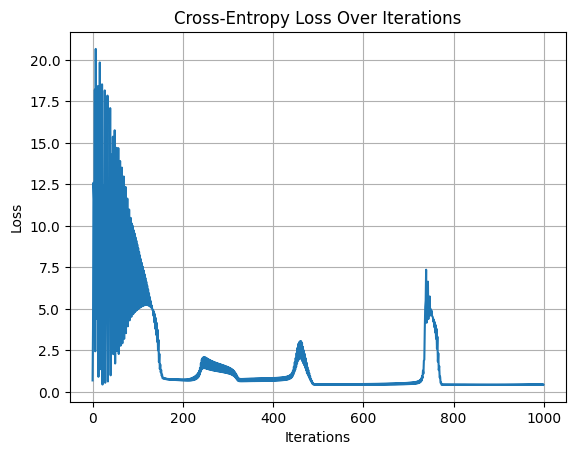

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets


# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class logistic_regression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) 
        self.bias = 0
        self.losses = []  # ← Track loss per iteration

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            
            # Binary cross-entropy loss
            loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
            self.losses.append(loss)

            # Gradient descent
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [1 if i > 0.5 else 0 for i in y_pred]
        return class_pred
    
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

if __name__ == "__main__":

    bc = datasets.load_breast_cancer()
    X, y = bc.data, bc.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    clf = logistic_regression(lr=0.0001, n_iters=1000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    print(accuracy(y_test, predictions))
    
    plt.plot(clf.losses)
    plt.title("Cross-Entropy Loss Over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()


In [ ]:
Simulated Carrot Detection Video Pipeline

In [ ]:
# Carrot Detection in Live Video Stream (Simulated Grocery Store Setup)

import cv2
import csv
import random
from datetime import datetime

# Simulated object detection model for carrots
def carrot_model(image):
    # This mock function mimics a pre-trained ML model that detects carrots in an image
    # For demonstration, it randomly detects a carrot 10% of the time with fake coordinates
    if random.random() < 0.1:
        return [{
            "label": "carrot",
            "confidence": round(random.uniform(0.8, 0.95), 2),
            "bbox": [100, 100, 80, 150]  # x, y, width, height
        }]
    return []

# Create a CSV file to store carrot sightings, simulating a grocery store inventory log
log_file = "carrot_detections.csv"
with open(log_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["timestamp", "confidence", "bbox"])

# Start capturing video from webcam
# The webcam feed simulates a live video stream inside a grocery store
cap = cv2.VideoCapture(0)  # Replace 0 with video file path for recorded footage

if not cap.isOpened():
    print("Error: Could not open video stream.")
    exit()

print("Press 'q' to stop the video stream.")

# Main loop: Process video frame by frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Feed current frame to the simulated model to detect carrots
    detections = carrot_model(frame)

    for det in detections:
        if det["label"] == "carrot":
            x, y, w, h = det["bbox"]
            conf = det["confidence"]
            timestamp = datetime.now().isoformat()

            # Draw detection results directly on the video feed
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 165, 255), 2)
            cv2.putText(frame, f"Carrot: {conf}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 165, 255), 2)

            # Log each carrot detection with timestamp and location
            with open(log_file, mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([timestamp, conf, det["bbox"]])

    # Display the video feed with annotations (for visual confirmation)
    cv2.imshow("Carrot Detection", frame)

    # End video stream when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup once video ends
cap.release()
cv2.destroyAllWindows()
print("Detection ended. Results saved to carrot_detections.csv")

In [ ]:
Summary & What Would Be Done with More Time
This project gave me the chance to demonstrate both:

How a basic classification model works (via logistic regression)

How machine learning could be integrated into a real-time system (via a simulated carrot detection pipeline)

I implemented a logistic regression model from scratch to show my understanding of classification fundamentals.

I also created a mock video pipeline that simulates detecting carrots in a live video feed, representing how such a system might operate in a grocery store setting.

If I had more time, I would:
Replace the mock detection logic with a real trained model (e.g. YOLOv5)

Make the video pipeline asynchronous to better handle live video without dropping frames

Add object tracking to avoid duplicate detections across frames